In [9]:
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
import os
os.chdir("..") 

In [6]:
%run pneumonia_classifier.py
%run config.py

In [7]:
model_path = "trained/Resnet50Model2-adam-0.0001-64-20-augment/epoch_19/model.pth"

In [8]:
model = PenumoniaClassifier(model_path)

In [11]:
image_path = "data/train/0_PNEUMONIA/person5_bacteria_16.jpeg"

In [14]:
image = Image.open(image_path).convert("RGB")

In [15]:
visualization, pred_label, original_image = model.predict(image)

In [18]:
def show_visualization(image_path):
    image = Image.open(image_path).convert("RGB")
    visualization, pred_label, original_image = model.predict(image)
    
    fig = plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(visualization)
    plt.axis("off")
    # plt.show()
    plt.suptitle(f"Predicted {CLASSES[pred_label]}")

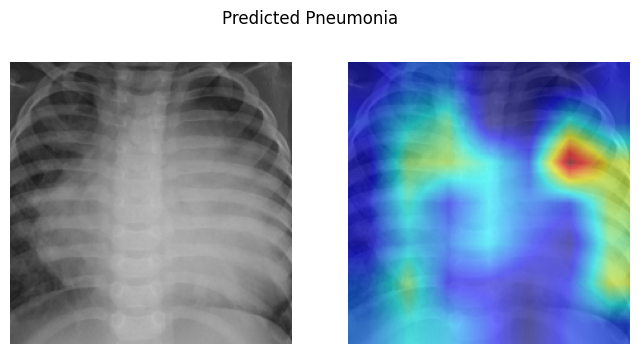

In [19]:
show_visualization("data/train/0_PNEUMONIA/person5_bacteria_16.jpeg")

In [35]:
show_visualization("data/train/1_NORMAL/person5_bacteria_16.jpeg")

tensor([[[0.4078, 0.4000, 0.3961,  ..., 0.3961, 0.4235, 0.4000],
         [0.4039, 0.3882, 0.3882,  ..., 0.4000, 0.4157, 0.4078],
         [0.4118, 0.3961, 0.4000,  ..., 0.4039, 0.4078, 0.4000],
         ...,
         [0.7176, 0.7137, 0.7059,  ..., 0.6275, 0.6157, 0.6039],
         [0.7176, 0.7098, 0.7176,  ..., 0.6235, 0.6196, 0.6118],
         [0.7137, 0.7020, 0.7020,  ..., 0.6353, 0.6157, 0.6196]],

        [[0.4078, 0.4000, 0.3961,  ..., 0.3961, 0.4235, 0.4000],
         [0.4039, 0.3882, 0.3882,  ..., 0.4000, 0.4157, 0.4078],
         [0.4118, 0.3961, 0.4000,  ..., 0.4039, 0.4078, 0.4000],
         ...,
         [0.7176, 0.7137, 0.7059,  ..., 0.6275, 0.6157, 0.6039],
         [0.7176, 0.7098, 0.7176,  ..., 0.6235, 0.6196, 0.6118],
         [0.7137, 0.7020, 0.7020,  ..., 0.6353, 0.6157, 0.6196]],

        [[0.4078, 0.4000, 0.3961,  ..., 0.3961, 0.4235, 0.4000],
         [0.4039, 0.3882, 0.3882,  ..., 0.4000, 0.4157, 0.4078],
         [0.4118, 0.3961, 0.4000,  ..., 0.4039, 0.4078, 0.

In [38]:
from PIL import Image
image = Image.fromarray((original_image.numpy()) * 255).astype(np.uint8)

TypeError: Cannot handle this data type: (1, 1, 224), <f4

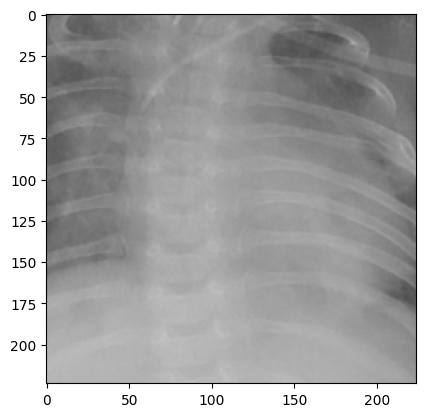

In [44]:
plt.imshow(original_image.permute(1, 2, 0).numpy())

In [40]:
visualization.shape

(224, 224, 3)

In [46]:
torch.save(model.model.state_dict(), "best_model.pth")